In [1]:
#this piece of code uploaded from keras doc bcz our gpu shouldnt go above 50% if it goes then tf model wont work properly and results in errors
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [47]:
from tensorflow import keras
from keras.layers import Dense,Lambda,Flatten,Input
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from keras.optimizers import adam_v2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.preprocessing import OneHotEncoder 
from matplotlib.pyplot import imshow
plt.style.use("dark_background")
from PIL import Image

In [4]:
img_size=[128,128]

train_path="C:/Users/U/Downloads/leaf_desease/train/"
test_path="C:/Users/U/Downloads/leaf_desease/test"

In [5]:
inceptionv3=InceptionV3(input_shape=img_size+[3],include_top=False)

In [6]:
#we will not train existing weights
for layer in inceptionv3.layers:
    layer.trainable=False

In [12]:
folder=glob("C:/Users/U/Downloads/leaf_desease/train/*")

In [13]:
len(folder)

4

In [14]:
x=Flatten()(inceptionv3.output)

In [17]:
prediction=Dense(len(folder),activation="softmax")(x)

model=Model(inputs=inceptionv3.input,outputs=prediction)

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [19]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test = ImageDataGenerator(rescale = 1./255)

In [24]:
training=train.flow_from_directory("C:/Users/U/Downloads/leaf_desease/train/",target_size=(128,128),batch_size=32,class_mode="categorical")

testing=test.flow_from_directory("C:/Users/U/Downloads/leaf_desease/test/",target_size=(128,128),batch_size=13,class_mode="categorical")

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [26]:
model_main=model.fit_generator(training,validation_data=testing,epochs=10,steps_per_epoch=len(training),validation_steps=len(testing))

<ipython-input-26-0ad8795ffafc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_main=model.fit_generator(training,validation_data=testing,epochs=10,steps_per_epoch=len(training),validation_steps=len(testing))


Epoch 1/10
61/61 [==============================] - 63s 970ms/step - loss: 0.9338 - accuracy: 0.7063 - val_loss: 0.2884 - val_accuracy: 0.8333
Epoch 2/10
61/61 [==============================] - 31s 513ms/step - loss: 0.5027 - accuracy: 0.8273 - val_loss: 0.2562 - val_accuracy: 0.8889
Epoch 3/10
61/61 [==============================] - 35s 570ms/step - loss: 0.5350 - accuracy: 0.8350 - val_loss: 0.2980 - val_accuracy: 0.8889
Epoch 4/10
61/61 [==============================] - 35s 576ms/step - loss: 0.4516 - accuracy: 0.8396 - val_loss: 0.0999 - val_accuracy: 0.9444
Epoch 5/10
61/61 [==============================] - 36s 585ms/step - loss: 0.4950 - accuracy: 0.8519 - val_loss: 0.3013 - val_accuracy: 0.9444
Epoch 6/10
61/61 [==============================] - 36s 582ms/step - loss: 0.4646 - accuracy: 0.8570 - val_loss: 0.2053 - val_accuracy: 0.9444
Epoch 7/10
61/61 [==============================] - 37s 599ms/step - loss: 0.3803 - accuracy: 0.8852 - val_loss: 0.0228 - val_accuracy: 1.0000

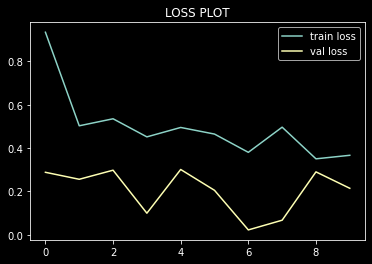

In [41]:
#loss plotting
plt.plot(model_main.history['loss'],label="train loss")
plt.plot(model_main.history["val_loss"],label="val loss")
plt.legend()
plt.title("LOSS PLOT")
plt.show()

Text(0.5, 1.0, 'ACCURACY PLOT')

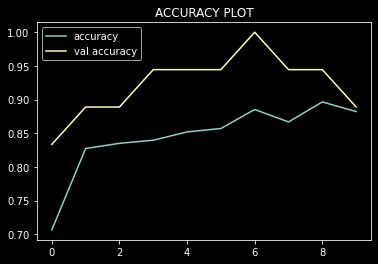

In [42]:
#accuracy plotting
plt.plot(model_main.history["accuracy"],label="accuracy")
plt.plot(model_main.history["val_accuracy"],label="val accuracy")
plt.legend()
plt.title("ACCURACY PLOT")

In [36]:
from keras.models import load_model
model.save("leaf_desease_detection.h5")

In [80]:
def names(number):
    if number==0:
        return "leaf is infected"
    else:
        return "leaf is fresh"

100.0% Confidence this leaf is fresh


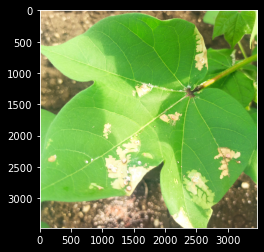

In [81]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:/Users/U/Downloads/leaf_desease/test/diseased cotton leaf/dis_leaf (248).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence this ' + names(classification))

100.0% Confidence this leaf is fresh


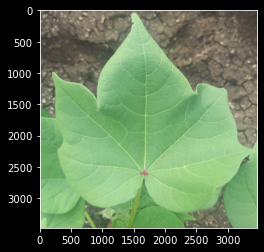

In [82]:
img = Image.open(r"C:/Users/U/Downloads/leaf_desease/test/fresh cotton leaf/d (341).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence this ' + names(classification))